In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

DATA UNDERSTANDING

In [34]:
df = pd.read_csv("data_transaksi_petshop1.csv")
df

,ID Transaksi,Tanggal Transaksi,Nama Barang,Kategori,Jumlah Terjual,Harga Satuan,Total Harga,Metode Pembayaran
0,TX-20241001-001,2024-10-01,Life Cat Pouch - Chicken Tuna Adult,Makanan,8,130000,1040000,Tunai
1,TX-20241006-001,2024-10-06,Trixie Cat Tunnel,Mainan,1,4435,4435,QRIS
2,TX-20240114-001,2024-01-14,Beaphar Ear Cleaner for Dogs & Cats,Obat Hewan,2,4435,8870,Tunai
3,TX-20240311-001,2024-03-11,Life Cat Pouch - Salmon Adult,Makanan,16,250000,4000000,QRIS
4,TX-20240707-001,2024-07-07,Life Cat Pouch - Kitten Chicken,Makanan,6,12024,72144,Transfer
...,...,...,...,...,...,...,...,...
1346,TX-20240614-005,2024-06-14,Frontline Plus Flea & Tick Treatment,Obat Hewan,11,12024,132264,Transfer
1347,TX-20240819-004,2024-08-19,Seresto Flea and Tick Collar for Dogs,Obat Hewan,9,4435,39915,QRIS
1348,TX-20240413-003,2024-04-13,Kong Puppy Teething Stick,Mainan,4,130000,520000,QRIS
1349,TX-20240102-007,2024-01-02,Trixie Cat Scratching Post,Mainan,3,12024,36072,Transfer


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1351 entries, 0 to 1350
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   ID Transaksi       1351 non-null   object
 1   Tanggal Transaksi  1351 non-null   object
 2   Nama Barang        1351 non-null   object
 3   Kategori           1351 non-null   object
 4   Jumlah Terjual     1351 non-null   int64 
 5   Harga Satuan       1351 non-null   int64 
 6   Total Harga        1351 non-null   int64 
 7   Metode Pembayaran  1351 non-null   object
dtypes: int64(3), object(5)
memory usage: 84.6+ KB


In [36]:
df.isnull().sum()

ID Transaksi         0
Tanggal Transaksi    0
Nama Barang          0
Kategori             0
Jumlah Terjual       0
Harga Satuan         0
Total Harga          0
Metode Pembayaran    0
dtype: int64

In [37]:
df.duplicated().sum()

np.int64(0)

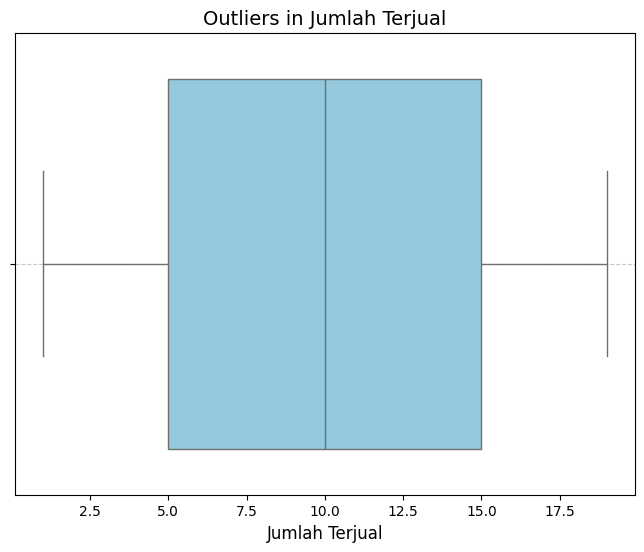

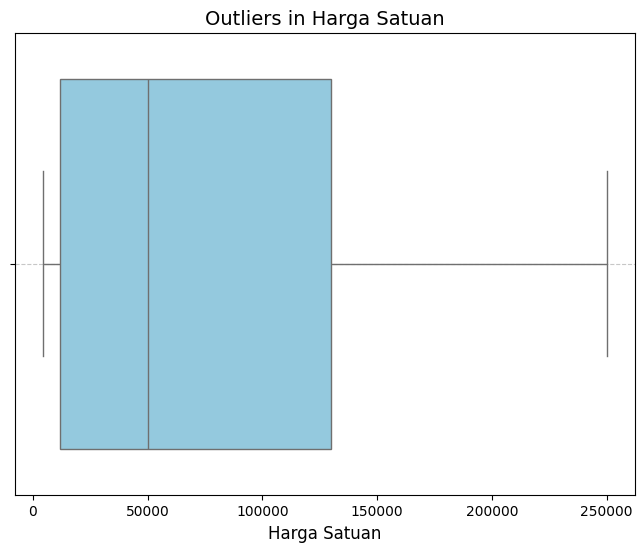

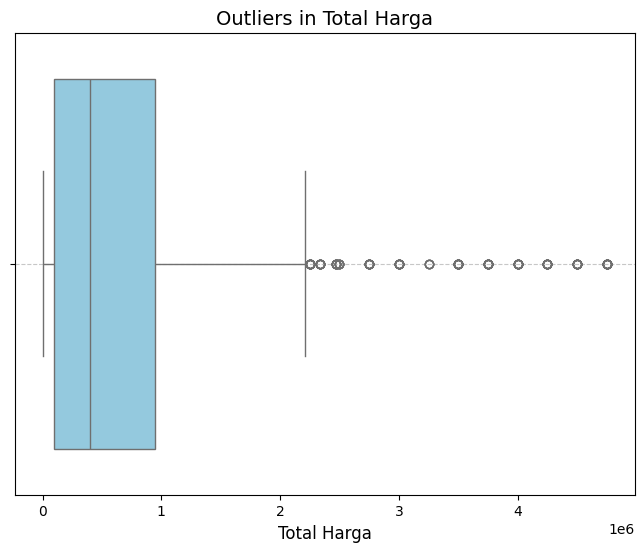

In [38]:
# Mendeteksi outlier menggunakan rentang interkuartil (IQR) untuk kolom numerik
def plot_outliers(column_name, title):
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=df[column_name], color='skyblue')
    plt.title(title, fontsize=14)
    plt.xlabel(column_name, fontsize=12)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

plot_outliers('Jumlah Terjual', 'Outliers in Jumlah Terjual')
plot_outliers('Harga Satuan', 'Outliers in Harga Satuan')
plot_outliers('Total Harga', 'Outliers in Total Harga')


C:\Users\user\AppData\Local\Temp\ipykernel_12880\2988802089.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_distribution.index, y=category_distribution.values, palette="viridis")


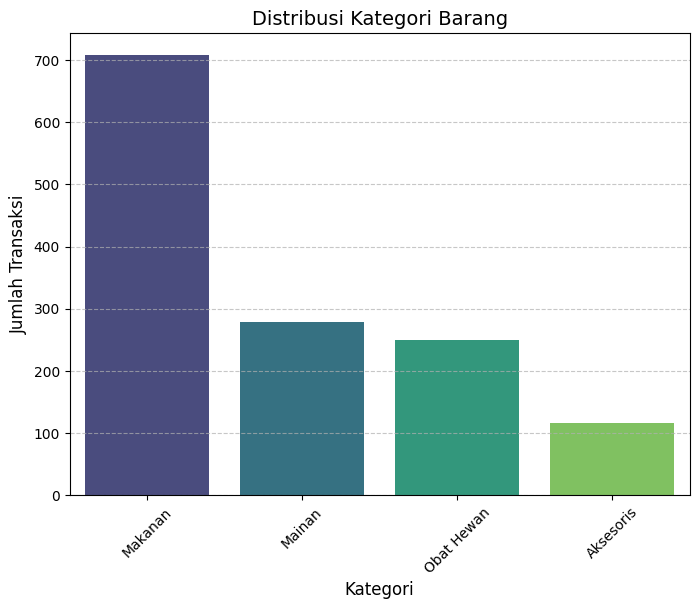

In [39]:
# Menampilkan jumlah transaksi berdasarkan kategori barang
category_distribution = df['Kategori'].value_counts()

plt.figure(figsize=(8, 6))
sns.barplot(x=category_distribution.index, y=category_distribution.values, palette="viridis")
plt.title("Distribusi Kategori Barang", fontsize=14)
plt.xlabel("Kategori", fontsize=12)
plt.ylabel("Jumlah Transaksi", fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

C:\Users\user\AppData\Local\Temp\ipykernel_12880\539559230.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=payment_distribution.index, y=payment_distribution.values, palette="viridis")


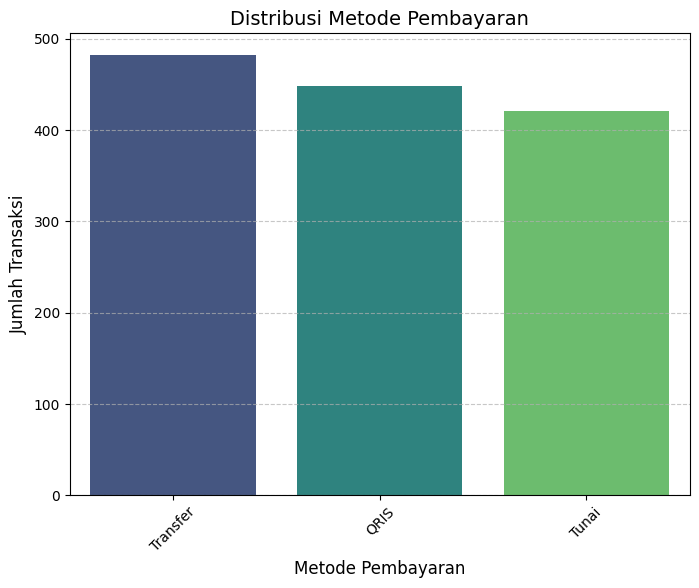

In [40]:
# Memperlihatkan proporsi penggunaan metode pembayaran.
payment_distribution = df['Metode Pembayaran'].value_counts()

plt.figure(figsize=(8, 6))
sns.barplot(x=payment_distribution.index, y=payment_distribution.values, palette="viridis")
plt.title("Distribusi Metode Pembayaran", fontsize=14)
plt.xlabel("Metode Pembayaran", fontsize=12)
plt.ylabel("Jumlah Transaksi", fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [47]:
# Menampilkan transaksi yang terdeteksi sebagai outlier berdasarkan kolom Total Harga
plt.figure(figsize=(12, 6))
sns.boxplot(x='Kategori', y='Total Harga', data=outliers_total_harga, palette="coolwarm")
plt.title("Outliers in Total Harga by Kategori", fontsize=14)
plt.xlabel("Kategori", fontsize=12)
plt.ylabel("Total Harga", fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

TypeError: Data source must be a DataFrame or Mapping, not <class 'pandas.core.series.Series'>.

<Figure size 1200x600 with 0 Axes>

In [52]:
df.describe(include='all')

,ID Transaksi,Tanggal Transaksi,Nama Barang,Kategori,Jumlah Terjual,Harga Satuan,Total Harga,Metode Pembayaran
count,1351,1351,1351,1351,1351.000000,1351.000000,1.351000e+03,1351
unique,1351,333,25,4,NaN,NaN,NaN,3
top,TX-20240423-004,2024-05-31,Life Cat Pouch - Chicken Adult,Makanan,NaN,NaN,NaN,Transfer
freq,1,11,65,708,NaN,NaN,NaN,482
mean,NaN,NaN,NaN,NaN,9.913397,81632.384900,8.002299e+05,NaN
std,NaN,NaN,NaN,NaN,5.514215,84131.107472,1.057884e+06,NaN
min,NaN,NaN,NaN,NaN,1.000000,4435.000000,4.435000e+03,NaN
25%,NaN,NaN,NaN,NaN,5.000000,12024.000000,9.619200e+04,NaN
50%,NaN,NaN,NaN,NaN,10.000000,50000.000000,4.000000e+05,NaN
75%,NaN,NaN,NaN,NaN,15.000000,130000.000000,9.500000e+05,NaN
